In [2]:
from sklearn.manifold import MDS
from matplotlib import pyplot as plt
import sklearn.datasets as dt
import seaborn as sns         
import numpy as np
from PIL import Image
from sklearn.metrics.pairwise import manhattan_distances, euclidean_distances
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob

In [5]:
def mapData(dist_matrix, X, y, metric, title):
    mds = MDS(metric=metric, dissimilarity='precomputed', random_state=0)
    # Get the embeddings
    pts = mds.fit_transform(dist_matrix)
    # Plot the embedding, colored according to the class of the points
    fig = plt.figure(2, (15,6))
    ax = fig.add_subplot(1,2,1)    
    ax = sns.scatterplot(x=pts[:, 0], y=pts[:, 1],
                         hue=y, palette=['r', 'g', 'b', 'c'])

    # Add the second plot
    ax = fig.add_subplot(1,2,2)
    # Plot the points again
    plt.scatter(pts[:, 0], pts[:, 1])
    
    # Annotate each point by its corresponding face image
    for x, ind in zip(X, range(pts.shape[0])):
        im = x.reshape(64,64)
        imagebox = OffsetImage(im, zoom=0.3, cmap=plt.cm.gray)
        i = pts[ind, 0]
        j = pts[ind, 1]
        ab = AnnotationBbox(imagebox, (i, j), frameon=False)
        ax.add_artist(ab)
    plt.title(title)    
    plt.show()

In [6]:
filelist = glob.glob('data_generated/*.png')
x = np.array([np.array(Image.open(fname).convert('L')) for fname in filelist])

In [34]:
import matplotlib.pyplot as plt
import numpy as np

def img_is_color(img):

    if len(img.shape) == 3:
        # Check the color channels to see if they're all the same.
        c1, c2, c3 = img[:, : , 0], img[:, :, 1], img[:, :, 2]
        if (c1 == c2).all() and (c2 == c3).all():
            return True

    return False

def show_image_list(list_images, list_titles=None, list_cmaps=None, grid=True, num_cols=2, figsize=(20, 10), title_fontsize=30):
    '''
    Shows a grid of images, where each image is a Numpy array. The images can be either
    RGB or grayscale.
    Parameters:
    ----------
    images: list
        List of the images to be displayed.
    list_titles: list or None
        Optional list of titles to be shown for each image.
    list_cmaps: list or None
        Optional list of cmap values for each image. If None, then cmap will be
        automatically inferred.
    grid: boolean
        If True, show a grid over each image
    num_cols: int
        Number of columns to show.
    figsize: tuple of width, height
        Value to be passed to pyplot.figure()
    title_fontsize: int
        Value to be passed to set_title().
    '''

    #assert isinstance(list_images, list)
    assert len(list_images) > 0
    assert isinstance(list_images[0], np.ndarray)

    if list_titles is not None:
        assert isinstance(list_titles, list)
        assert len(list_images) == len(list_titles), '%d imgs != %d titles' % (len(list_images), len(list_titles))

    if list_cmaps is not None:
        assert isinstance(list_cmaps, list)
        assert len(list_images) == len(list_cmaps), '%d imgs != %d cmaps' % (len(list_images), len(list_cmaps))

    num_images  = len(list_images)
    num_cols    = min(num_images, num_cols)
    num_rows    = int(num_images / num_cols) + (1 if num_images % num_cols != 0 else 0)

    # Create a grid of subplots.
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    
    # Create list of axes for easy iteration.
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]

    for i in range(num_images):

        img    = list_images[i]
        title  = list_titles[i] if list_titles is not None else 'Image %d' % (i)
        cmap   = list_cmaps[i] if list_cmaps is not None else (None if img_is_color(img) else 'gray')
        
        list_axes[i].imshow(img, cmap=cmap)
        list_axes[i].set_title(title, fontsize=title_fontsize) 
        list_axes[i].grid(grid)

    for i in range(num_images, len(list_axes)):
        list_axes[i].set_visible(False)

    fig.tight_layout()
    _ = plt.show()

indexes = range(10)
show_image_list(x[indexes], ["Generated images"]*10, list_cmaps=['gray']*10, num_cols=5)

AssertionError: 

In [36]:
x

array([[[ 62,  63,  64, ..., 191, 134, 126],
        [ 73,  73,  90, ..., 128, 102,  83],
        [ 78,  49,  60, ...,  97,  77,  78],
        ...,
        [ 52,  85,  74, ...,  70,  79,  70],
        [ 55,  95,  57, ...,  60,  53,  82],
        [ 73, 104,  90, ...,  34,  61,  43]],

       [[ 49,  42,  32, ..., 181, 175, 134],
        [ 13,  38,  45, ..., 139, 149, 122],
        [ 36,  26,  33, ..., 139,  88,  69],
        ...,
        [ 23,  60,  41, ...,  22,  35,  38],
        [  8,  32,  44, ...,  22,  34,  37],
        [ 47,  18,  35, ...,  56,  53,  45]],

       [[ 30,  28,  14, ..., 205, 187, 162],
        [ 24,  20,  21, ..., 183, 162, 139],
        [ 21,  19,  18, ..., 152,  94, 102],
        ...,
        [ 26,  17,  24, ...,  28,  28,  11],
        [ 29,  24,  14, ...,  26,  24,  14],
        [ 11,  44,  27, ...,  17,  26,  23]],

       ...,

       [[217, 207, 174, ...,  70,  51,  81],
        [227, 174, 187, ...,  67,  43,  45],
        [128, 101, 149, ...,  51,  47,  50

In [13]:
filelist_target = glob.glob('TI/*.png')
target_img = np.array([np.array(Image.open(fname).convert('L')) for fname in filelist_target])

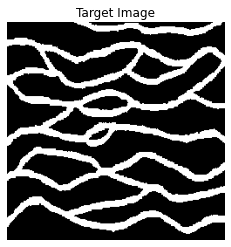

In [17]:
plt.imshow(target_img[0], cmap='gray')
plt.title('Target Image')
plt.axis('off')
plt.show()

In [ ]:
faces = dt.fetch_olivetti_faces()
X_faces = faces.data
y_faces = faces.target
ind = y_faces < 4
X_faces = X_faces[ind,:]
y_faces = y_faces[ind]